<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/EDA_DataSanityChecks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Melbourne_Housing.csv')

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
data.shape

(27114, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['BuildingArea'].apply(type).value_counts()

<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [ ]:
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'],np.nan)
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [ ]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [ ]:
data.duplicated().sum()

11

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.0,2.992473e+00,0.954667,1.0,2.0,3.0,4.0,16.0
Distance,27102.0,1.127993e+01,6.783958,0.0,6.4,10.5,14.0,48.1
Postcode,27102.0,3.113787e+03,111.129025,3000.0,3046.0,3088.0,3153.0,3978.0
Bedroom,20678.0,3.046184e+00,0.955024,0.0,2.0,3.0,4.0,20.0
Bathroom,20672.0,1.591525e+00,0.701106,0.0,1.0,1.0,2.0,9.0
Car,20297.0,1.715820e+00,0.994487,0.0,1.0,2.0,2.0,18.0
Landsize,17873.0,5.605366e+02,1411.309127,50.0,220.0,513.0,664.0,76000.0
BuildingArea,10529.0,1.545119e+02,130.583872,11.0,101.0,133.0,183.0,6791.0
YearBuilt,11985.0,1.966618e+03,36.042000,1850.0,1950.0,1970.0,2000.0,2019.0
Propertycount,27103.0,7.564741e+03,4494.028347,83.0,4294.0,6567.0,10412.0,21650.0


In [ ]:
data.Postcode.nunique()

209

In [ ]:
cat_cols = ['Suburb','Type','SellerG','Regionname']
for column in cat_cols:
  print(data[column].value_counts())
  print('-'*50)

Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
--------------------------------------------------
h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victor

In [ ]:
for column in cat_cols:
  print(data[column].value_counts(normalize=True))
  print('-'*50)

Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Wandin North      0.000037
Ferny Creek       0.000037
Tecoma            0.000037
Montrose          0.000037
viewbank          0.000037
Name: Suburb, Length: 345, dtype: float64
--------------------------------------------------
h    0.678670
u    0.217024
t    0.104306
Name: Type, dtype: float64
--------------------------------------------------
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Allan            0.000037
Jim              0.000037
iProperty        0.000037
Batty            0.000037
Icon             0.000037
Name: SellerG, Length: 347, dtype: float64
--------------------------------------------------
Southern Metropolitan         0.312880
Northern Metropolitan         0.288123
Western Metropolitan          0.

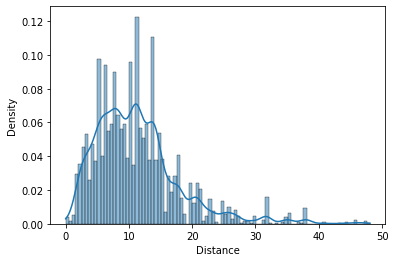

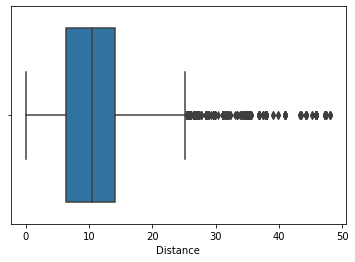

In [ ]:
sns.histplot(data=data, x='Distance',stat='density', kde=True)
plt.show()
sns.boxplot(data=data, x='Distance')
plt.show()

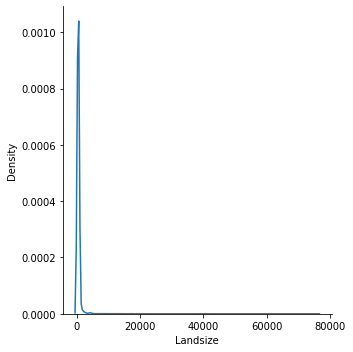

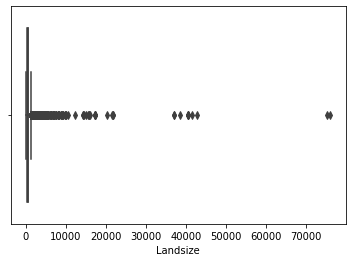

In [ ]:
sns.displot(data=data, x='Landsize', kind='kde')
plt.show()
sns.boxplot(data=data, x='Landsize')
plt.show()

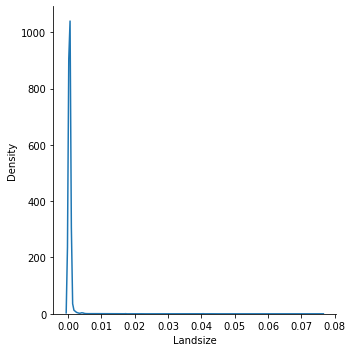

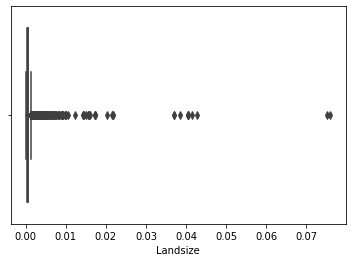

In [ ]:
sns.displot(data=data, x=data['Landsize']/1000000, kind='kde')
plt.show()
sns.boxplot(data=data, x=data['Landsize']/1000000)
plt.show()

In [ ]:
data.loc[data['Landsize']>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


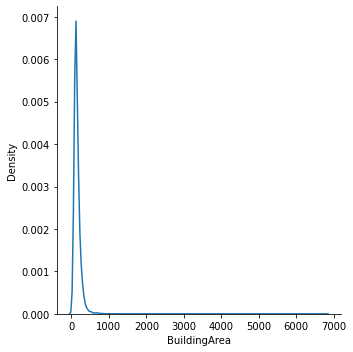

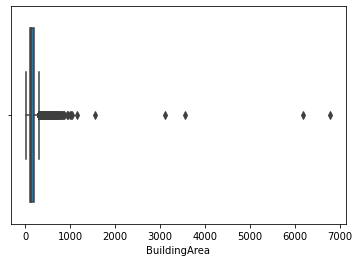

In [ ]:
sns.displot(data=data, x='BuildingArea', kind='kde')
plt.show()
sns.boxplot(data=data, x='BuildingArea')
plt.show()

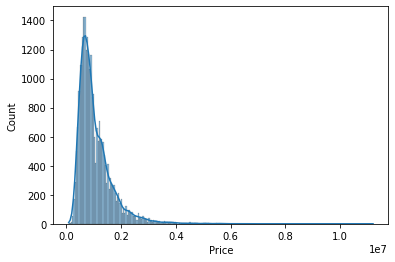

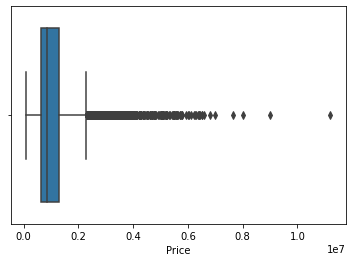

In [ ]:
sns.histplot(data=data, x='Price', kde=True)
plt.show()
sns.boxplot(data=data, x='Price')
plt.show()

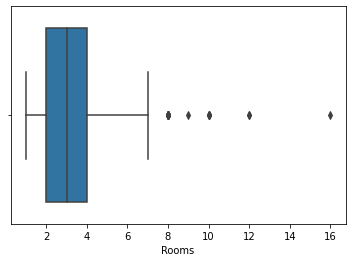

In [ ]:
sns.boxplot(data=data, x='Rooms')
plt.show()

In [ ]:
data.loc[data['Rooms']>7].shape

(23, 16)

In [ ]:
data.loc[data['Rooms']>7,'Type'].value_counts()

h    21
u     2
Name: Type, dtype: int64

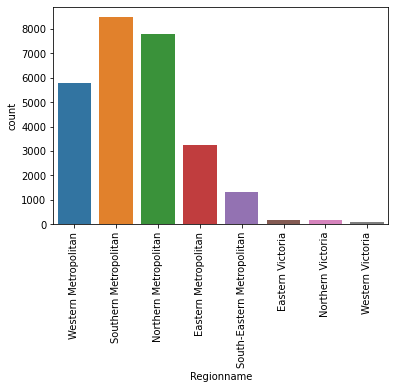

In [ ]:
sns.countplot(data=data, x='Regionname')
plt.xticks(rotation=90)
plt.show()

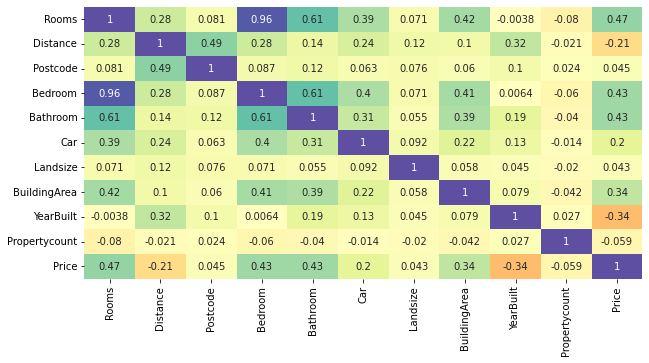

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1,cbar=False)
plt.show()

In [ ]:
data['TotalSpace'] = data['Rooms'] + data ['Bedroom'] + data['Bathroom'] + data['Car']

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0


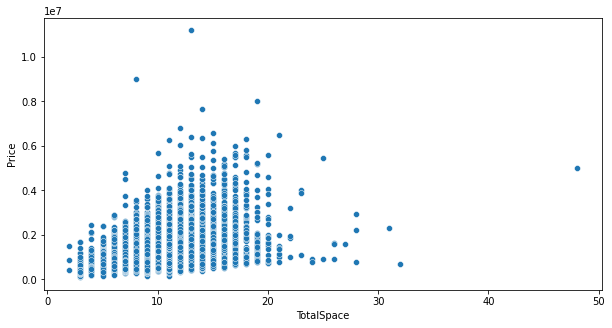

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='TotalSpace', y='Price')
plt.show()

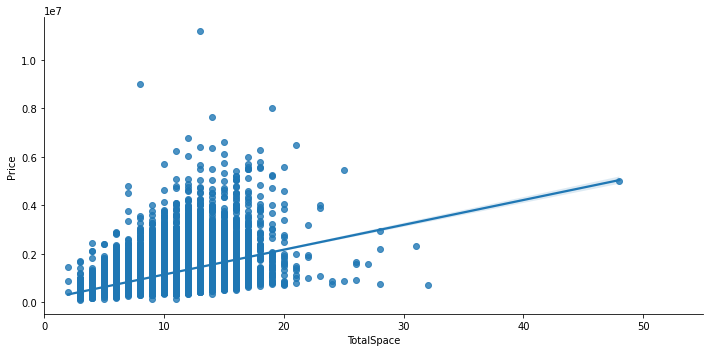

In [ ]:
sns.lmplot(data=data, x='TotalSpace', y='Price',height=5, aspect=2)
plt.xlim(0,55)
plt.show()

In [ ]:
data[['TotalSpace','Price']].corr()

,TotalSpace,Price
TotalSpace,1.000000,0.458282
Price,0.458282,1.000000


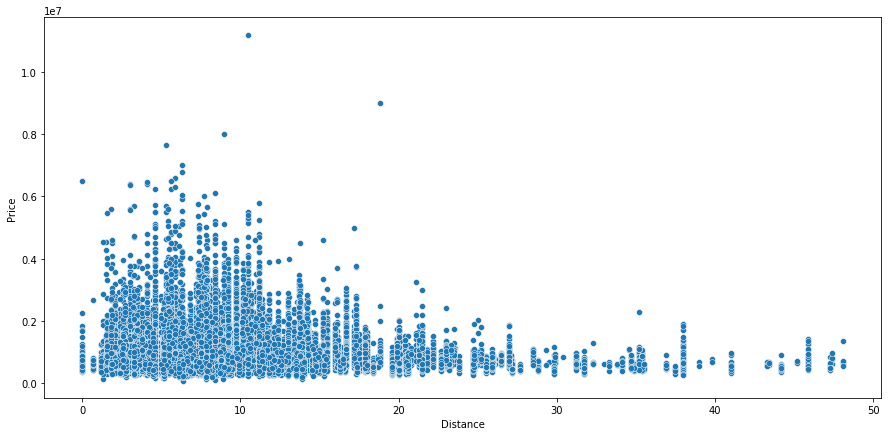

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y='Price')
plt.show()

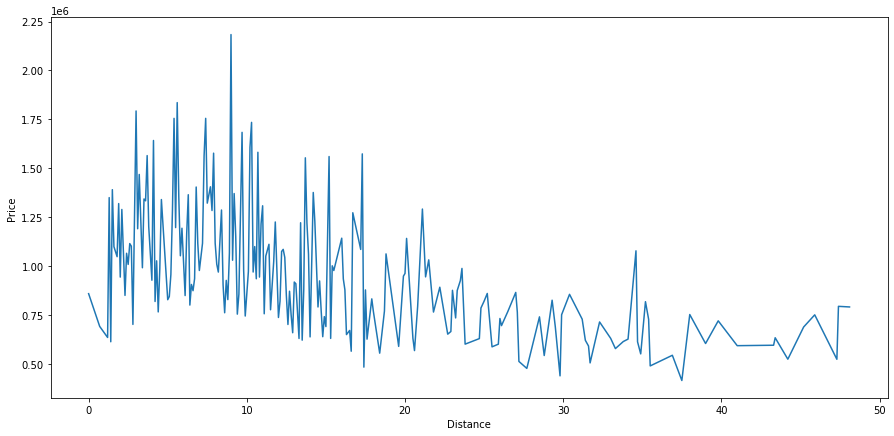

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Distance', y='Price', ci=None)
plt.show()

In [ ]:
data['distance_bins']=pd.cut(data['Distance'], bins=[0,15,30,50], labels=['Nearby', 'Moderately Close', 'Far'], right=False)

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,distance_bins
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby


<AxesSubplot:xlabel='distance_bins', ylabel='Price'>

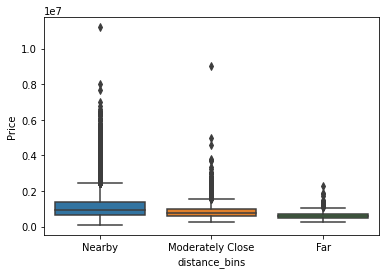

In [ ]:
sns.boxplot(data=data, x='distance_bins', y='Price')

<AxesSubplot:xlabel='distance_bins', ylabel='Price'>

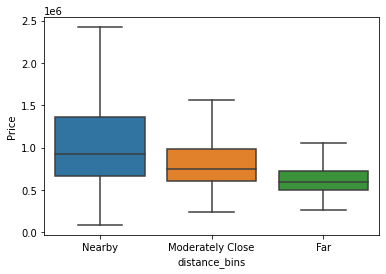

In [ ]:
sns.boxplot(data=data, x='distance_bins', y='Price', showfliers=False)

In [ ]:
year_at_sale= data['Date'].dt.year
year_at_sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int64

In [ ]:
np.max(year_at_sale)

2018

In [ ]:
data['Age_of_Prop'] = year_at_sale - data['YearBuilt']

In [ ]:
data[data['Age_of_Prop']<0]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,distance_bins,Age_of_Prop
285,Avondale Heights,3,t,Nelson,2016-03-12,10.5,3034.0,3.0,3.0,1.0,557.0,181.0,2017.0,Western Metropolitan,4502,851000,10.0,Nearby,-1.0
13854,Bentleigh,3,h,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Southern Metropolitan,6795,1100000,11.0,Nearby,-1.0
15232,Reservoir,4,h,Barry,2016-09-17,11.2,3073.0,3.0,2.0,2.0,834.0,129.0,2017.0,Northern Metropolitan,21650,767500,11.0,Nearby,-1.0
19463,Keilor East,3,h,Nelson,2016-04-23,12.8,3033.0,3.0,2.0,1.0,630.0,126.0,2017.0,Western Metropolitan,5629,825000,9.0,Nearby,-1.0
21326,Brighton East,2,h,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Southern Metropolitan,6938,1310000,11.0,Nearby,-2.0
24897,Newport,3,h,Jas,2016-05-28,8.4,3015.0,4.0,2.0,1.0,487.0,190.0,2017.0,Western Metropolitan,5498,945000,10.0,Nearby,-1.0
27069,Heidelberg,3,h,Miles,2016-07-30,10.6,3084.0,5.0,3.0,2.0,649.0,357.0,2017.0,Eastern Metropolitan,2890,1030000,13.0,Nearby,-1.0


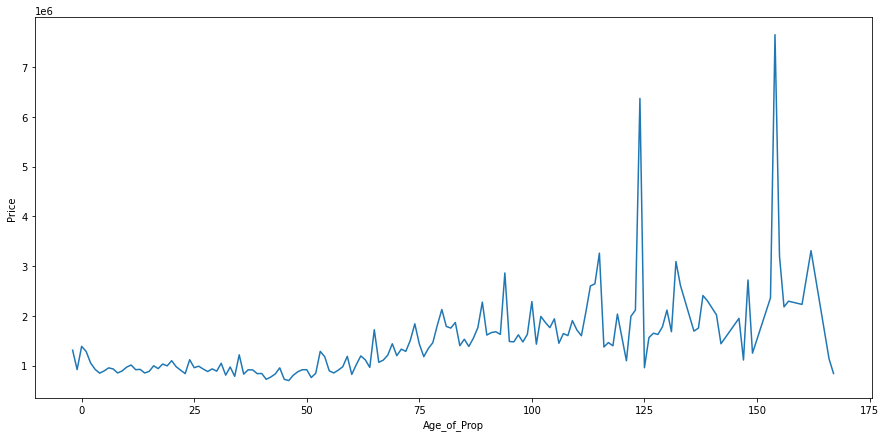

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data,x='Age_of_Prop', y='Price', ci=None)
plt.show()

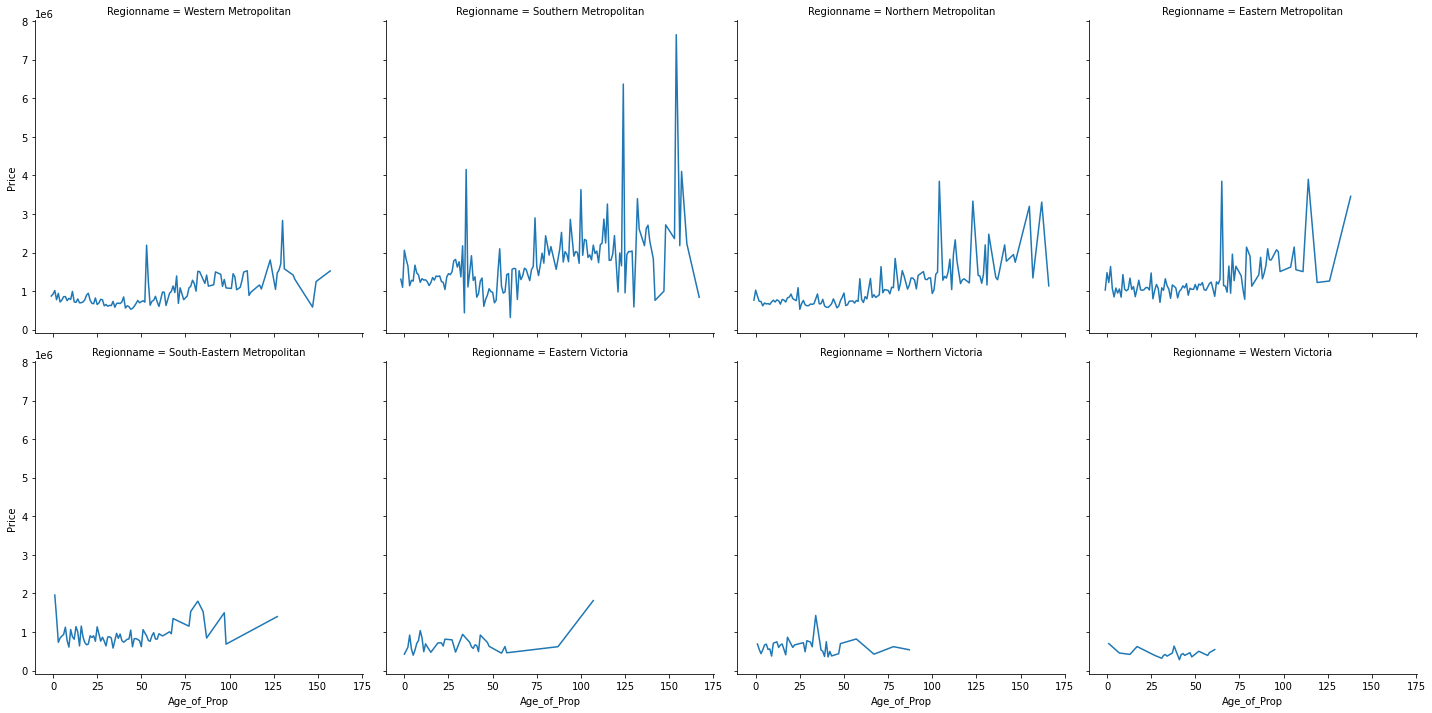

In [ ]:
sns.relplot(data=data, x='Age_of_Prop', y='Price',col='Regionname',kind='line',ci=None,col_wrap=4)

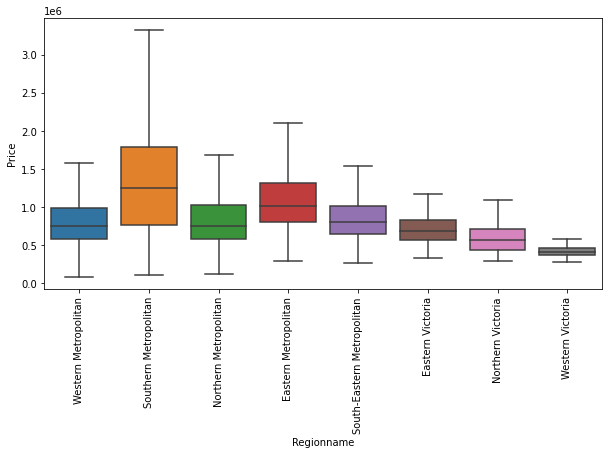

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Regionname', y='Price', showfliers=False)
plt.xticks(rotation=90)
plt.show()

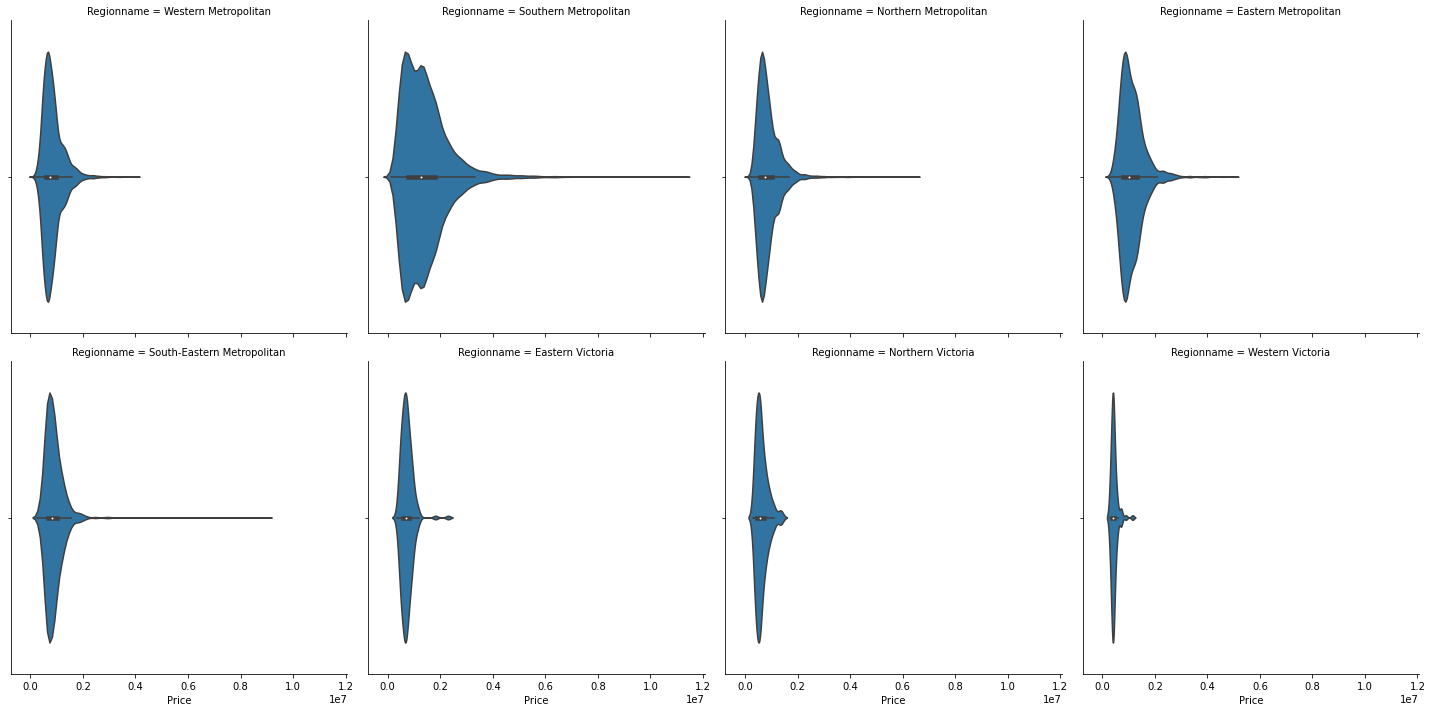

In [ ]:
sns.catplot(data=data, x='Price',col='Regionname',col_wrap=4, kind='violin')
plt.show()

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Distance,1,0.003690
Postcode,1,0.003690
Bedroom,6425,23.705863
Bathroom,6431,23.728001
Car,6806,25.111611
Landsize,9230,34.055271
BuildingArea,16574,61.151902
YearBuilt,15118,55.779803
TotalSpace,6806,25.111611
distance_bins,1,0.003690


In [ ]:
data.loc[data['Distance'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,distance_bins,Age_of_Prop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [ ]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,distance_bins,Age_of_Prop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Distance,1,0.003690
Postcode,1,0.003690
Bedroom,6425,23.705863
Bathroom,6431,23.728001
Car,6806,25.111611
Landsize,9230,34.055271
BuildingArea,16574,61.151902
YearBuilt,15118,55.779803
TotalSpace,6806,25.111611
distance_bins,1,0.003690


In [ ]:
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom       Car
Regionname                 Type                              
Eastern Metropolitan       h     3.551948  1.806961  1.946176
                           t     3.032051  1.852564  1.673077
                           u     2.357143  1.263393  1.290179
Eastern Victoria           h     3.559701  1.880597  2.098485
                           u     2.666667  1.000000  1.333333
Northern Metropolitan      h     3.106336  1.467878  1.684897
                           t     2.567198  1.619590  1.362187
                           u     1.878049  1.160127  1.092652
Northern Victoria          h     3.496403  1.892086  2.145985
                           u     3.000000  2.000000  2.000000
South-Eastern Metropolitan h     3.475924  1.713326  2.093574
                           t     2.886792  1.849057  1.679245
                           u     2.260274  1.205479  1.342466
Southern Metropolitan      h     3.383430  1.840283  1.882764
                           t     3.024014  2.012027  1.779690
                           u     1.938541  1.190805  1.134870
Western Metropolitan       h     3.244238  1.576159  1.906782
                           t     2.879747  1.850794  1.538217
                           u     2.106339  1.192229  1.143737
Western Victoria           h     3.379310  1.448276  2.060241

In [ ]:
data['Bedroom'] = data['Bedroom'].fillna(value=data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [ ]:
data['Bathroom'] = data['Bathroom'].fillna(value=data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [ ]:
data['Car'] = data['Car'].fillna(value=data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
TotalSpace,6805,25.108848
Age_of_Prop,15117,55.778171


In [ ]:
data['Bedroom']=data['Bedroom'].astype(int)
data['Bathroom']=data['Bathroom'].astype(int)
data['Car']=data['Car'].astype(int)

In [ ]:
data.drop('TotalSpace',axis=1,inplace=True)

In [ ]:
data['TotalSpace'] = data['Rooms']+data['Bedroom']+data['Bathroom']+data['Car']
data['TotalSpace'] = data['TotalSpace'].astype(int)

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Age_of_Prop,15117,55.778171


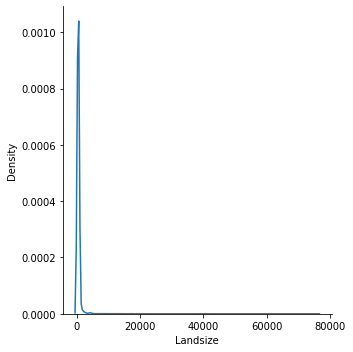

In [ ]:
sns.displot(data=data, x='Landsize', kind='kde')
plt.show()

In [ ]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h        693.5
                           t        236.0
                           u        208.0
Eastern Victoria           h        840.0
                           u        230.0
Northern Metropolitan      h        482.0
                           t        145.0
                           u         50.0
Northern Victoria          h        737.5
                           u        315.0
South-Eastern Metropolitan h        632.0
                           t        248.0
                           u        210.0
Southern Metropolitan      h        593.0
                           t        267.0
                           u         50.0
Western Metropolitan       h        537.0
                           t        200.0
                           u         80.0
Western Victoria           h        603.0

In [ ]:
data['Landsize'] = data['Landsize'].fillna(value=data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Age_of_Prop,15117,55.778171


In [ ]:
new_data = data[data['BuildingArea'].notnull()]
new_data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,distance_bins,Age_of_Prop,TotalSpace
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3,2,1,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,9
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2,1,0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,5
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3,2,4,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,13
5,Altona,3,h,Greg,2016-03-09,13.8,3018.0,3,2,1,352.0,242.0,2015.0,Western Metropolitan,5301,520000,Nearby,1.0,9
6,Altona North,5,h,FN,2016-03-09,11.1,3025.0,5,3,6,592.0,251.0,1965.0,Western Metropolitan,5132,1085000,Nearby,51.0,19


In [ ]:
data = data.drop(['BuildingArea','YearBuilt','Age_of_Prop'],axis=1)

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0], 'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage


In [ ]:
data.to_csv('/content/drive/MyDrive/datasets/Melbourne_Housing_Nomissing.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Melbourne_Housing_Nomissing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,distance_bins,TotalSpace
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3,2,1,303.0,Western Metropolitan,3464,840000,Nearby,9
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2,1,0,120.0,Southern Metropolitan,3280,1275000,Nearby,5
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2,1,0,159.0,Southern Metropolitan,3280,1455000,Nearby,5
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3,2,4,853.0,Northern Metropolitan,2211,2000000,Nearby,13
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3,2,2,208.0,Northern Metropolitan,2211,1110000,Nearby,10


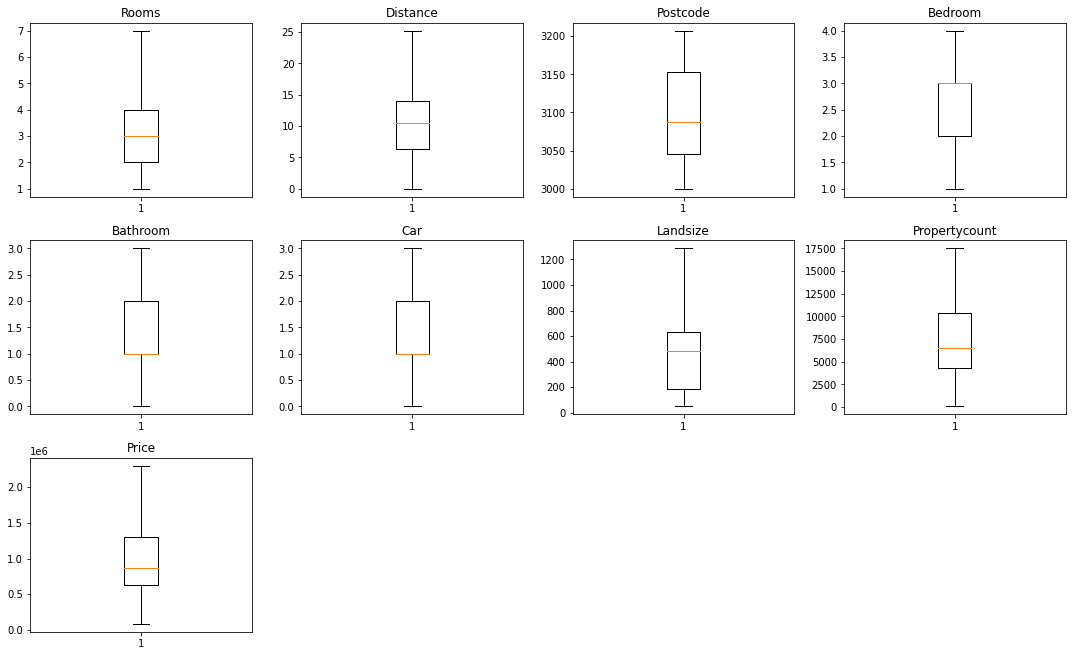

In [ ]:
num_cols = ['Rooms','Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']
plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable], whis=1.5, showfliers=False)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

In [ ]:
(((data[num_cols]<lower_whisker) | (data[num_cols]>upper_whisker)).sum()/data.shape[0])*100

Rooms            0.084865
Distance         4.342853
Postcode         2.911224
Bedroom          4.195262
Bathroom         0.870784
Car              4.305955
Landsize         1.741569
Propertycount    2.671390
Price            4.660173
dtype: float64

In [ ]:
def treat_outliers (df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR
  df[col] = np.clip(df[col], lower_whisker, upper_whisker)
  return df

In [ ]:
data['Bathroom'].quantile(0.25)

1.0

In [ ]:
data = treat_outliers(data, 'Rooms')

In [ ]:
data = treat_outliers(data, 'Bedroom')
data = treat_outliers(data, 'Bathroom')
data = treat_outliers(data, 'Car')
data = treat_outliers(data, 'Landsize')

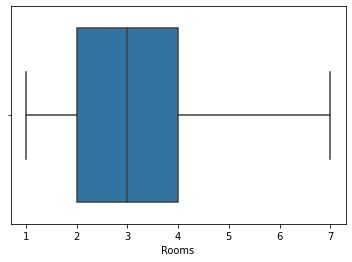

In [ ]:
sns.boxplot(data=data, x='Rooms')
plt.show()

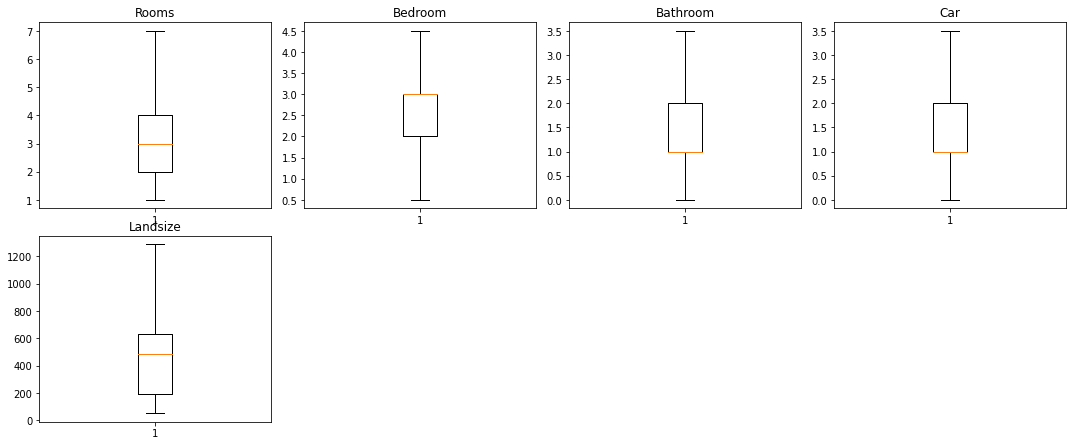

In [ ]:
num_cols = ['Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize']
plt.figure(figsize=(15,12))

for i,variable in enumerate(num_cols):
  plt.subplot(4,4,i+1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()